In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [2]:
# baja y lee los datos
training = torchvision.datasets.FashionMNIST(root="./", train=True, download=True)
train_loader = torch.utils.data.DataLoader(training,shuffle=True)

testing = torchvision.datasets.FashionMNIST(root="./", train=False, download=True, 
                                            transform=torchvision.transforms.Normalize((0), (1.0)))
testing_loader = torch.utils.data.DataLoader(testing, shuffle=True)

torch.Size([60000, 28, 28])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


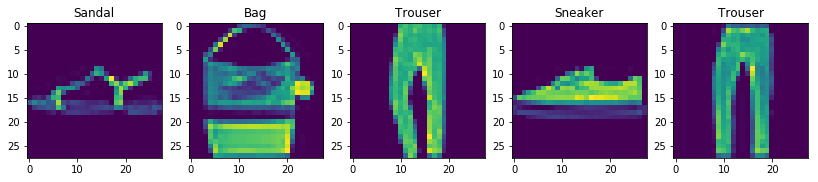

In [3]:
# muestra algunos ejemplos
print(train_loader.dataset.data.size())
print(train_loader.dataset.classes)
n_items = train_loader.dataset.data.size()[0]
random_items = np.random.choice(np.arange(n_items), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(train_loader.dataset.data[item])
    plt.title(train_loader.dataset.classes[train_loader.dataset.targets[item]] )

In [4]:
# Selecciona y normaliza 600 para entrenar
train  = train_loader.dataset.data[:600].float()
target = train_loader.dataset.targets[:600].float()

mean = train.mean(dim=0)
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std
np.shape(train)
x_train = train.unsqueeze(1)


In [5]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 15, kernel_size=10, stride=3),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(15,7,kernel_size=4),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(7,15,kernel_size=4),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(15,1,kernel_size=10, stride=3),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [6]:
# inicializa modelo, loss y optimizador
num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

In [7]:
# entrenamiento
for epoch in range(num_epochs):
    output = model(x_train)
    loss = distance(output, x_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/100], loss:0.9932
epoch [2/100], loss:0.9891
epoch [3/100], loss:0.9764
epoch [4/100], loss:0.9550
epoch [5/100], loss:0.9378
epoch [6/100], loss:0.9298
epoch [7/100], loss:0.9051
epoch [8/100], loss:0.9068
epoch [9/100], loss:0.8905
epoch [10/100], loss:0.8913
epoch [11/100], loss:0.8850
epoch [12/100], loss:0.8814
epoch [13/100], loss:0.8769
epoch [14/100], loss:0.8717
epoch [15/100], loss:0.8659
epoch [16/100], loss:0.8646
epoch [17/100], loss:0.8590
epoch [18/100], loss:0.8543
epoch [19/100], loss:0.8445
epoch [20/100], loss:0.8359
epoch [21/100], loss:0.8256
epoch [22/100], loss:0.8170
epoch [23/100], loss:0.8083
epoch [24/100], loss:0.8003
epoch [25/100], loss:0.7931
epoch [26/100], loss:0.7874
epoch [27/100], loss:0.7763
epoch [28/100], loss:0.7695
epoch [29/100], loss:0.7641
epoch [30/100], loss:0.7586
epoch [31/100], loss:0.7460
epoch [32/100], loss:0.7375
epoch [33/100], loss:0.7293
epoch [34/100], loss:0.7202
epoch [35/100], loss:0.7096
epoch [36/100], loss:0.7032
e

In [10]:
x_transform = model(x_train)
latent_space = model.encoder(x_train)

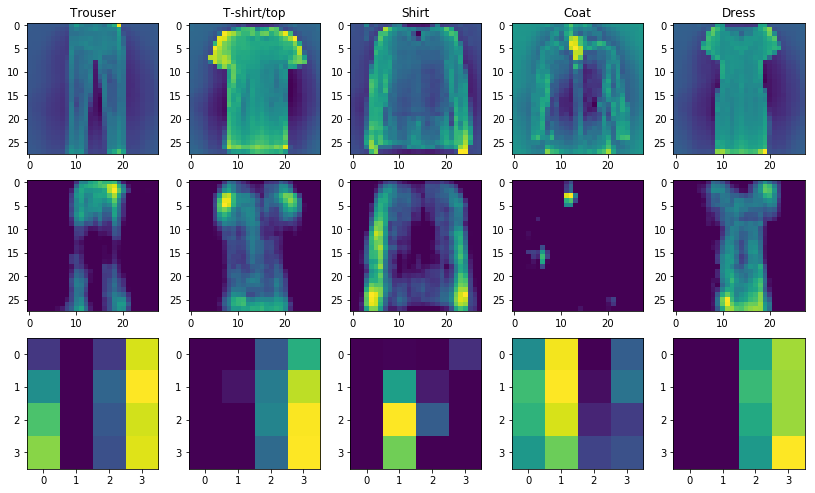

In [12]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
offset = 16
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(x_train[i+offset][0].detach().numpy())
    plt.title(train_loader.dataset.classes[train_loader.dataset.targets[i+offset]] )
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())
